# Resume Parser - Data Analysis & Visualization

This notebook performs exploratory data analysis on the parsed resume data, including:
- Skill frequency analysis
- Education distribution
- Data quality metrics
- Candidate demographics

**Note**: Run the main script first to generate parsed_resumes.csv

```bash
python run.py
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
csv_path = "../data/processed_output/parsed_resumes.csv"

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print(f"✓ Loaded {len(df)} resumes")
    print(f"\nDataset shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nFirst few records:")
    df.head()
else:
    print(f"✗ File not found: {csv_path}")
    print("Please run 'python run.py' first to generate the CSV file")

✓ Loaded 2 resumes

Dataset shape: (2, 7)

Columns: ['Name', 'Email', 'Phone', 'Education', 'Skills', 'File', 'FilePath']

First few records:



SKILL FREQUENCY ANALYSIS

Total unique skills found: 26
Total skill mentions: 39

Top 15 Most Frequent Skills:
  Python: 2
  Go: 2
  Machine Learning: 2
  Scikit-learn: 2
  Pandas: 2
  NumPy: 2
  SQL: 2
  Matplotlib: 2
  Seaborn: 2
  MongoDB: 2
  Git: 2
  Power BI: 2
  Mac: 2
  Data Analysis: 1
  Plotly: 1


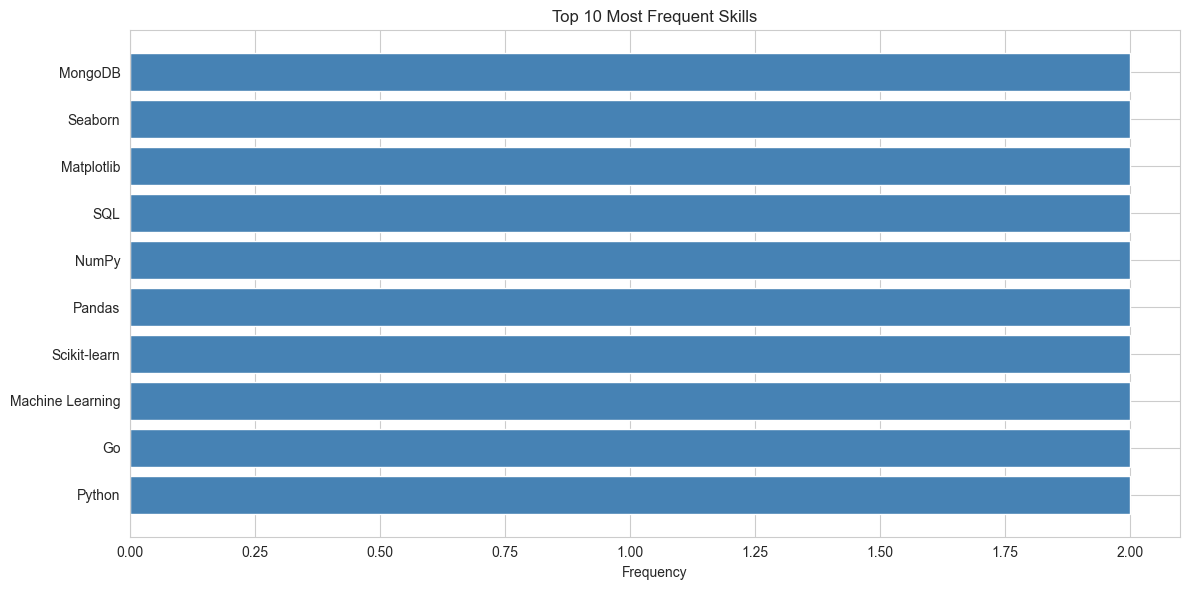

In [2]:
# === SKILL FREQUENCY ANALYSIS ===
print("\n" + "="*60)
print("SKILL FREQUENCY ANALYSIS")
print("="*60)

all_skills = []
for skills in df["Skills"].dropna():
    # Handle both string and list formats
    if isinstance(skills, str):
        # If it's a string with commas, split it
        skills_list = [s.strip() for s in skills.split(',')]
    else:
        skills_list = skills if isinstance(skills, list) else []
    all_skills.extend(skills_list)

skill_counts = Counter(all_skills)
print(f"\nTotal unique skills found: {len(skill_counts)}")
print(f"Total skill mentions: {len(all_skills)}")

# Top 15 skills
print("\nTop 15 Most Frequent Skills:")
for skill, count in skill_counts.most_common(15):
    print(f"  {skill}: {count}")

# Visualize top skills
if skill_counts:
    top_skills = dict(skill_counts.most_common(10))
    plt.figure(figsize=(12, 6))
    plt.barh(list(top_skills.keys()), list(top_skills.values()), color='steelblue')
    plt.xlabel('Frequency')
    plt.title('Top 10 Most Frequent Skills')
    plt.tight_layout()
    plt.show()


EDUCATION DISTRIBUTION ANALYSIS

Education qualifications found:
Education
B.Tech    2
Name: count, dtype: int64

Missing education data: 0 (0.0%)


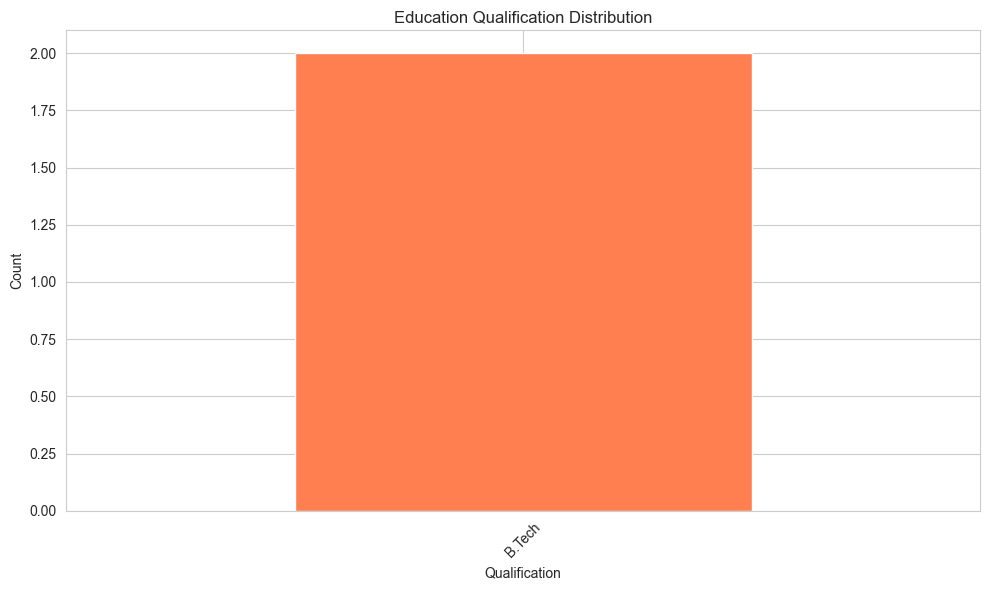

In [3]:
# === EDUCATION DISTRIBUTION ===
print("\n" + "="*60)
print("EDUCATION DISTRIBUTION ANALYSIS")
print("="*60)

education_counts = df["Education"].value_counts()
print(f"\nEducation qualifications found:")
print(education_counts)
print(f"\nMissing education data: {df['Education'].isna().sum()} ({df['Education'].isna().sum()/len(df)*100:.1f}%)")

# Visualize education distribution
if len(education_counts) > 0:
    plt.figure(figsize=(10, 6))
    education_counts.plot(kind='bar', color='coral')
    plt.title('Education Qualification Distribution')
    plt.xlabel('Qualification')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


DATA QUALITY METRICS

Field Completion Rates:
  Name: 2/2 (100.0%)
  Email: 2/2 (100.0%)
  Phone: 2/2 (100.0%)
  Education: 2/2 (100.0%)
  Skills: 2/2 (100.0%)

Skill Coverage:
  Candidates with skills identified: 2/2 (100.0%)

Summary Statistics:
  Total resumes processed: 2
  Average skills per resume: 19.50
  Unique skills identified: 26


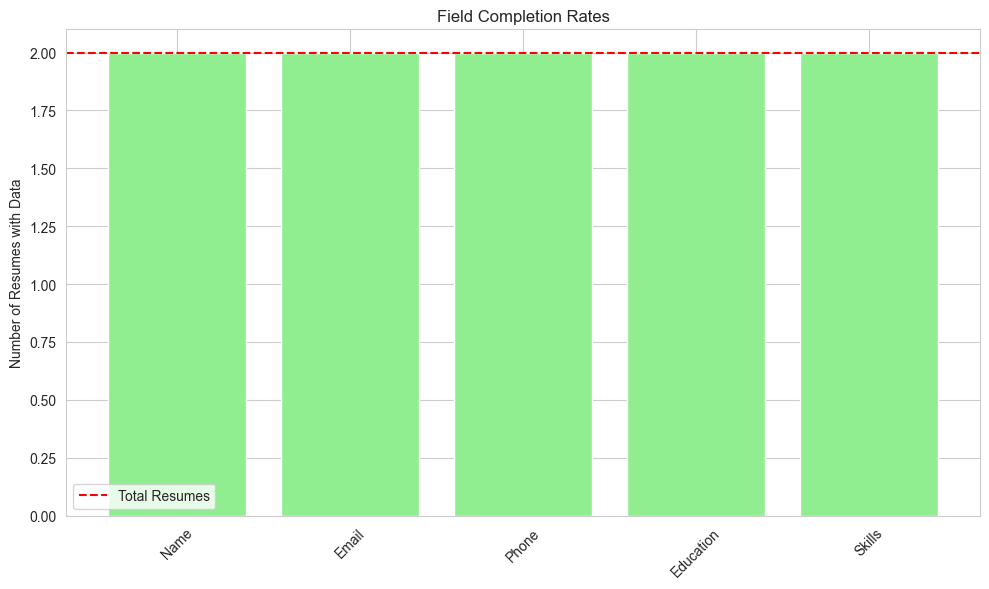

In [4]:
# === DATA QUALITY METRICS ===
print("\n" + "="*60)
print("DATA QUALITY METRICS")
print("="*60)

print("\nField Completion Rates:")
for col in ["Name", "Email", "Phone", "Education", "Skills"]:
    if col in df.columns:
        filled = df[col].notna().sum()
        total = len(df)
        completion_rate = (filled / total * 100) if total > 0 else 0
        print(f"  {col}: {filled}/{total} ({completion_rate:.1f}%)")

print("\nSkill Coverage:")
candidates_with_skills = (df["Skills"].notna() & (df["Skills"] != "")).sum()
print(f"  Candidates with skills identified: {candidates_with_skills}/{len(df)} ({candidates_with_skills/len(df)*100:.1f}%)")

print("\nSummary Statistics:")
print(f"  Total resumes processed: {len(df)}")
print(f"  Average skills per resume: {len(all_skills)/max(1, len(df)):.2f}")
print(f"  Unique skills identified: {len(skill_counts)}")

# Data quality visualization
quality_data = {
    'Name': df['Name'].notna().sum(),
    'Email': df['Email'].notna().sum(),
    'Phone': df['Phone'].notna().sum(),
    'Education': df['Education'].notna().sum(),
    'Skills': (df["Skills"].notna() & (df["Skills"] != "")).sum(),
}

plt.figure(figsize=(10, 6))
plt.bar(quality_data.keys(), quality_data.values(), color='lightgreen')
plt.axhline(y=len(df), color='r', linestyle='--', label='Total Resumes')
plt.title('Field Completion Rates')
plt.ylabel('Number of Resumes with Data')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()